## Project Overview

In this notebook, we embark on a comprehensive sentiment analysis journey in Python, leveraging two distinct techniques:

- **VADER (Valence Aware Dictionary and Sentiment Reasoner)**: We explore the VADER model, a sentiment analysis tool that employs a "bag of words" approach. This rule-based method is known for its simplicity and effectiveness in analyzing text sentiment.

- **RoBERTa Pretrained Model from 🤗 Hugging Face**: We also delve into the world of deep learning with RoBERTa, a powerful pre-trained transformer model. By leveraging the 🤗 Hugging Face pipeline, we harness the capabilities of state-of-the-art NLP models for sentiment analysis.

Throughout this project, we aim to gain valuable insights into these two techniques, understand their strengths and limitations, and ultimately provide a comprehensive analysis of sentiment in text data. Let's dive in and explore the fascinating world of sentiment analysis!


## Import data and essential libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [2]:
df = pd.read_csv('Amazon_Reviews.csv', low_memory=False, header=0)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1.0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2.0,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3.0,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4.0,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5.0,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
df.shape

(556249, 10)

Since the data has a large number of reviews, we'll use a smaller dataset for our analysis which can be scaled to the original dataset.

In [4]:
df = df.iloc[:500]

## EDA 

**Visualizing Review Distribution by Rating**

Here, we create a bar plot to illustrate the distribution of reviews based on their ratings. This provides a clear view of how reviews are distributed across different score categories.

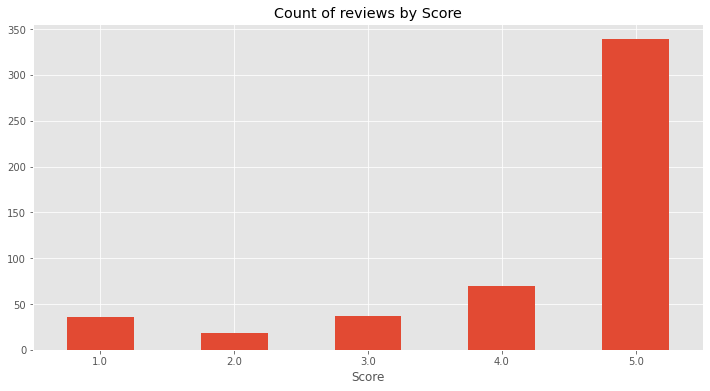

In [6]:
ax = df.Score.value_counts().sort_index().plot(kind='bar', title='Count of reviews by Score', figsize=(12,6))
ax.set_xlabel('Score')
plt.xticks(rotation=0)
plt.show()


## Exploring Natural Language Processing (NLP) with NLTK

In this section, we take a deep dive into the world of Natural Language Processing (NLP) by selecting a random review from our dataset and subjecting it to comprehensive analysis using NLTK.

In [7]:
example = df['Text'][99]
example

"I fed this to my Golden Retriever and he hated it.  He wouldn't eat it, and when he did, it gave him terrible diarrhea.  We will not be buying this again.  It's also super expensive."

In [8]:
df.iloc[99]['Score']

1.0

In [9]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['I', 'fed', 'this', 'to', 'my', 'Golden', 'Retriever', 'and', 'he', 'hated']

In [10]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('I', 'PRP'),
 ('fed', 'VBP'),
 ('this', 'DT'),
 ('to', 'TO'),
 ('my', 'PRP$'),
 ('Golden', 'NNP'),
 ('Retriever', 'NNPS'),
 ('and', 'CC'),
 ('he', 'PRP'),
 ('hated', 'VBD')]

In [11]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  fed/VBP
  this/DT
  to/TO
  my/PRP$
  (ORGANIZATION Golden/NNP Retriever/NNPS)
  and/CC
  he/PRP
  hated/VBD
  it/PRP
  ./.
  He/PRP
  would/MD
  n't/RB
  eat/VB
  it/PRP
  ,/,
  and/CC
  when/WRB
  he/PRP
  did/VBD
  ,/,
  it/PRP
  gave/VBD
  him/PRP
  terrible/JJ
  diarrhea/NN
  ./.
  We/PRP
  will/MD
  not/RB
  be/VB
  buying/VBG
  this/DT
  again/RB
  ./.
  It/PRP
  's/VBZ
  also/RB
  super/JJ
  expensive/NN
  ./.)


### **1. VADER Sentiment Analysis: Unpacking Text Emotions**

In this section, we harness NLTK's `SentimentIntensityAnalyzer` to dig into text sentiment. Instead of a simple positive/neutral/negative classification, VADER dissects emotions to provide intensity scores for negativity, neutrality, and positivity.

VADER's approach involves stripping away stop words, scoring each word, and summing these scores for a holistic sentiment value. It offers a deeper insight into text emotions, revealing nuances in language expression.


In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm   #For progress bars

In [13]:
# Instantiating the analyzer

sia = SentimentIntensityAnalyzer()

In [14]:
sia.polarity_scores('This is my first time exploring NLP. It is really interesting.')

{'neg': 0.0, 'neu': 0.77, 'pos': 0.23, 'compound': 0.4576}

In [15]:
example

"I fed this to my Golden Retriever and he hated it.  He wouldn't eat it, and when he did, it gave him terrible diarrhea.  We will not be buying this again.  It's also super expensive."

In [16]:
sia.polarity_scores(example)

{'neg': 0.173, 'neu': 0.735, 'pos': 0.092, 'compound': -0.5267}

The sentiment is primarily neutral but leans slightly towards negative due to the negative compound score (-0.5267).

In [17]:
# Run the polarity score on the entire dataset

res = {}

for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [18]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, on='Id')

In [19]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1.0,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2.0,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3.0,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4.0,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5.0,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


### Visualizing VADER Results

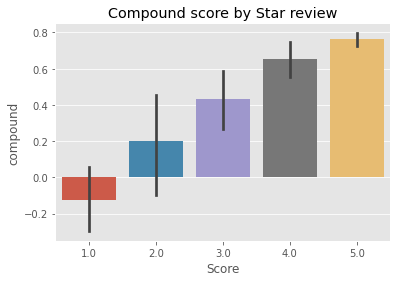

In [20]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound score by Star review')
plt.show()

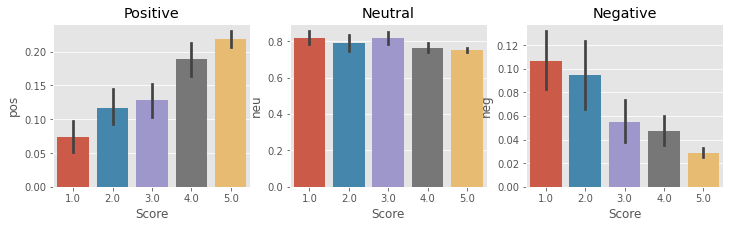

In [21]:
fig , ax = plt.subplots(1,3, figsize=(12,3))
sns.barplot(data=vaders, x='Score', y='pos', ax=ax[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=ax[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=ax[2])

ax[0].set_title("Positive")
ax[1].set_title("Neutral")
ax[2].set_title("Negative")

plt.show()

The bar plots offer a meaningful representation of various review types, showing a direct correlation between higher star ratings and more positive sentiments, as well as lower ratings corresponding to more negative sentiments.

### 2. RoBERTa Pretrained Model: Contextual Understanding at Scale

In this section, we delve into the capabilities of the RoBERTa pre-trained model, which has undergone extensive training on a vast and diverse corpus of text data. Unlike traditional methods, RoBERTa's transformative power extends beyond individual words; it comprehends the intricate web of contextual relationships between words, offering a nuanced understanding of language. This contextual prowess positions RoBERTa as a potent tool for our sentiment analysis endeavor.


In [22]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [23]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

KeyboardInterrupt: 

In [ ]:
# VADER results on example

print(example)
sia.polarity_scores(example)

In [ ]:
# Roberta results on example

encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
output

In [ ]:
scores = output[0][0].detach().numpy() # Transforming tensor to numpy to store locally
scores = softmax(scores) 
scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2],
}

scores_dict

In [ ]:
def polarity_scores_roberta(example):
    """
    Compute sentiment polarity scores using a RoBERTa pretrained model.

    This function takes an input text, encodes it using a RoBERTa tokenizer,
    passes it through a pretrained RoBERTa model, and calculates sentiment
    scores, returning them as a dictionary.
    """
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy() # Transforming tensor to numpy to store locally
    scores = softmax(scores) 
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2],
    }
    return scores_dict


In [ ]:
# Initialize an empty dictionary to store sentiment analysis results
res = {}

# Iterate through each row in the dataset
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        # Extract the text and unique identifier (ID) from the current row
        text = row['Text']
        myid = row['Id']
        
        # Perform sentiment analysis using VADER
        vader_result = sia.polarity_scores(text)
        
        # Rename VADER result keys to include 'vader_' prefix
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f'vader_{key}'] = value
        
        # Perform sentiment analysis using RoBERTa and combine results with VADER
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        
        # Store the combined results in the dictionary using the unique ID as the key
        res[myid] = both
    except RuntimeError:
        # Handle any runtime errors that may occur and print a message
        print(f'Broke for id {myid}')


In [ ]:
# Merging results_df with original dataframe

results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')


In [ ]:
results_df.head()

## **Sentiment Score Comparison: VADER vs. RoBERTa**

In [ ]:
results_df.columns

In [ ]:
#Create a pairplot to visualize relationships between sentiment scores from VADER and RoBERTA 

sns.pairplot(data=results_df, 
            vars=['vader_neg', 'vader_neu', 'vader_pos','roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')

plt.show()

The pairplot analysis of sentiment analysis results reveals distinct patterns between the VADER and RoBERTa models. The VADER model, being rule-based, appears to exhibit lower confidence levels in its sentiment predictions. In contrast, the RoBERTa model, with its deep learning capabilities, demonstrates higher confidence levels in its predictions. Notably, the RoBERTa model excels in separating sentiment categories, more effectively distinguishing between positive, neutral, and negative sentiments. 

## Analyzing Sample Reviews from the Results

In this section, we delve into specific examples by examining two distinct categories: "Positive" 1-star reviews and "Negative" 5-star reviews.

###  Positive 1 star reviews

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
results_df[results_df['Score'] == 1].sort_values('roberta_pos', ascending=False)[['vader_pos','vader_neu', \
                                                                                  'roberta_pos', 'roberta_neu','Text']][:3]

------

Indeed, it's worth noting that while both models interpreted 1-star reviews as somewhat positive, VADER exhibited a more conservative stance by assigning lower positive scores and higher neutral scores. This suggests that VADER, the rule-based model, was somewhat cautious and leaned towards neutrality when faced with such negative sentiments. This nuance highlights the different approaches taken by these models and how they handle the interpretation of sentiment in challenging scenarios like 1-star reviews.

### Negative sentiment 5 star reviews 

In [ ]:
results_df[results_df['Score'] == 5].sort_values('roberta_neg', ascending=False)[['vader_neg','vader_neu', \
                                                                                  'roberta_neg', 'roberta_neu','Text']][:3]

---

Both models followed a similar trend by leaning towards neutrality rather than strong positivity. However, it's noteworthy that RoBERTA inclined more towards assigning negative sentiment scores compared to VADER. Despite the high rating, RoBERTA detected some nuances of negativity, while VADER maintained a more neutral perspective. This observation suggests that RoBERTA may be more sensitive to subtle negative expressions even in highly positive reviews, showcasing its ability to capture nuanced sentiment variations.

## Transformers pipeline 

A streamlined approach to perform various natural language processing (NLP) tasks using pre-trained transformer models, simplifying NLP tasks with a unified interface for input and model predictions.

In [ ]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

In [ ]:
sent_pipeline('I am certainly enjoying diving deeper into NLP.')

In [ ]:
sent_pipeline('What could be my next NLP project?')

## Conclusion

In this NLP project, we delved into the fascinating world of sentiment analysis. We explored two distinct sentiment analysis models: VADER, a rule-based approach, and RoBERTA, a deep learning model. By analyzing their performance on 1-star and 5-star reviews, we uncovered intriguing insights into their strengths and weaknesses.

Despite the complexity of language and varying contexts, both models exhibited unique behaviors. VADER showcased a conservative approach, leaning towards neutrality in 1-star reviews, while RoBERTA displayed a sensitivity to subtle negativity. Conversely, in 5-star reviews, both models exhibited a similar tendency as 1-star review where VADER showed a conservative approach and RoBERTA was more senstive.

This project underscores the multifaceted nature of sentiment analysis and the importance of choosing the right model for specific tasks. Whether rule-based or deep learning, each approach has its merits and limitations. Understanding these nuances empowers us to make informed decisions when applying sentiment analysis in real-world applications.

With these insights, we conclude our sentiment analysis journey, and we hope this project has provided valuable insights into the fascinating field of natural language processing.
